In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from numpy.linalg import svd
import matplotlib
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.decomposition import TruncatedSVD
import re
from sklearn.cluster import KMeans
from pprint import pprint
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

## Load Data

In [2]:
quarter_embeds_path = "../data/career_embedding_window100_emb256.txt"
embed_data = pd.read_csv(quarter_embeds_path, sep=" ", header=None)

WCC_PD_PATH = "../data/wcc_pd.pkl"
with open(WCC_PD_PATH, "rb") as file:
    raw_data = pickle.load(file)
predicted_courses = set(raw_data["course_name"])

In [3]:
embed_data[0]

0            CS106A
1            MATH51
2            CS106B
3           STATS60
4             ECON1
            ...    
23890         SLE60
23891    ITALIAN321
23892    CHEMENG193
23893        ESS241
23894    TIBETLNG11
Name: 0, Length: 23895, dtype: object

## Clean Data

In [4]:
embed_data = embed_data.loc[(embed_data[0].isin(predicted_courses))]
embed_data = embed_data.reset_index(drop=True)
courses = embed_data[0]
coefs = embed_data.drop([0], axis=1)
courses

0          CS106A
1          MATH51
2          CS106B
3         STATS60
4           ECON1
          ...    
965    GEOPHYS265
966       GENE217
967        ESS158
968        ESS258
969        CME306
Name: 0, Length: 970, dtype: object

## Use PCA to visualize the embeddings

In [160]:
pca = PCA(n_components=2)
pca.fit(coefs.T)

PCA(n_components=2)

In [161]:
#pca.components_[0]

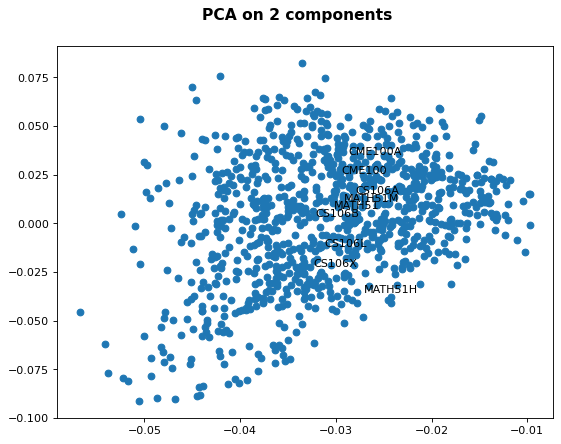

In [162]:
fig = plt.figure(figsize=(8, 6), dpi=80)
fig.suptitle('PCA on 2 components', fontsize=14, fontweight='bold')
    
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.90)
ax.plot(pca.components_[0], pca.components_[1], 'o')
# zip joins x and y coordinates in pairs
count = 0
for x,y in zip(pca.components_[0],pca.components_[1]):

    label = courses[count]
    count += 1
    if "MATH51" not in label and "CME100" not in label and "CS106" not in label:
        continue

    ax.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

## SVD Projection across different principal components

In [163]:
u, s, vh = svd(coefs, full_matrices=True)

In [164]:
def print_max_min_words(col, n_words=1):
    largest_indexes = np.argpartition(col, -n_words)[-n_words:]
    smallest_indexes = np.argpartition(col, n_words)[:n_words]
    print("Max ", n_words, " words are ")
    print([courses[idx] for idx in largest_indexes])
    print("Min ", n_words, " words are ")
    print([courses[idx] for idx in smallest_indexes])
    print("========================")

In [165]:
for i in range(0, len(s)):
    print("i = ", i)
    U_i = u[:,i]
    V_i = vh[:,i]
    print("U")
    print_max_min_words(U_i, n_words=25)
    print("V")
    print_max_min_words(V_i, n_words=25)

i =  0
U
Max  25  words are 
['CHEMENG355', 'MATH236', 'MATH238', 'PHYSICS231', 'PHYSICS211', 'CME206', 'MATH230B', 'EE253', 'PHYSICS330', 'BIOE201C', 'EE364B', 'EE236A', 'EE214B', 'CS229T', 'CME213', 'PHYSICS332', 'CS233', 'MATH215B', 'MATH230A', 'PHYSICS331', 'BIOE141B', 'MATH210C', 'STATS300A', 'ME346A', 'EE153']
Min  25  words are 
['COMM208', 'PSYCH60A', 'CEE271A', 'COMM177A', 'PHIL50', 'PSYCH134', 'HUMBIO3Y', 'PUBLPOL102', 'PSYCH178', 'PUBLPOL205', 'COMM206', 'IPS203', 'COMM274D', 'EARTHSYS101', 'COMM106', 'PSYCH193', 'PSYCH146', 'GEOPHYS220', 'PSYCH131', 'ESS158', 'COMM122', 'PSYCH187', 'PSYCH101', 'PSYCH175', 'HISTORY103D']
V
Max  25  words are 
['PHYSICS61', 'ECON113', 'EARTHSYS111', 'PHIL160A', 'PHYSICS130', 'ME80', 'CHEM31AC', 'STATS200', 'MATH51H', 'PHYSICS26', 'ECON102A', 'HUMBIO3B', 'MATH51', 'PSYCH50', 'PHYSICS63', 'ME70', 'PHYSICS23', 'ECON5', 'CEE101B', 'CME102', 'PHYSICS121', 'CHEM134', 'CS147', 'STATS60', 'MATH42']
Min  25  words are 
['MATH120', 'ECON52', 'CS224N', 

V
Max  25  words are 
['MATH53H', 'HUMBIO129S', 'PHIL80', 'CME100A', 'MATH104', 'STATS116', 'MS&E260', 'CHEMENG181', 'PHYSICS70', 'EE108', 'CS248', 'LINGUIST120', 'PHYSICS23', 'CS181', 'CS224N', 'PSYCH146', 'PHYSICS65', 'CS131', 'CME108', 'CS142', 'CS110', 'PHYSICS131', 'ME70', 'ME115A', 'ECON113']
Min  25  words are 
['PUBLPOL104', 'PHYSICS67', 'PSYCH60A', 'CS210B', 'MATH120', 'CHEM33', 'CME103', 'CS210A', 'ECON137', 'ENGR25B', 'MS&E130', 'PSYCH10', 'ENGR40', 'STATS202', 'COMM106', 'MS&E120', 'CHEMENG20', 'MS&E245G', 'CS108', 'MATH52H', 'MS&E111', 'CHEM175', 'STATS191', 'CS247', 'ECON149']
i =  70
U
Max  25  words are 
['CS262', 'AA279A', 'ECON107', 'ECON113', 'CHEMENG300', 'EE42', 'MS&E226', 'ECON158', 'ENGR205', 'PSYCH206', 'ENGR155A', 'PUBLPOL105', 'GEOPHYS120', 'EE284', 'PHIL182', 'HUMBIO112', 'MS&E112', 'PSYCH178', 'MS&E252', 'BIO41', 'BIO42', 'BIO43', 'ME346A', 'MATH138', 'CHEM185']
Min  25  words are 
['STATS315A', 'CS448B', 'CHEM135', 'CEE265D', 'PSYCH171', 'ECON127', 'CHEM110

['BIO115', 'ECON149', 'PHIL154', 'ENGR62', 'PSYCH266', 'PHYSICS91SI', 'PHIL152', 'STATS110', 'ENGR155B', 'ME280', 'ECON52', 'BIO101', 'PHIL186', 'MS&E245G', 'STATS195', 'CEE169', 'PHIL175', 'EARTHSYS164', 'HUMBIO151R', 'MS&E212', 'CS210B', 'HUMBIO129S', 'MATH138', 'OSPBER40M', 'STATS167']
V
Max  25  words are 
['CHEMENG181', 'ECON102A', 'CME108', 'PUBLPOL102', 'MATH151', 'ECON137', 'CME100', 'BIO41', 'HUMBIO3A', 'ECON135', 'CEE176B', 'PHYSICS45', 'PHIL160A', 'ENGR62', 'CS148', 'BIOE44', 'CHEM135', 'CME102', 'ECON50', 'CS221', 'CHEMENG110', 'PHYSICS62', 'CS147', 'PSYCH80', 'EE102A']
Min  25  words are 
['PSYCH131', 'PHYSICS44', 'PHYSICS41A', 'CS108', 'COMM106', 'MATH51H', 'ECON116', 'CS242', 'MATH108', 'PHIL170', 'CS106X', 'STATS200', 'CS247', 'CME104', 'ECON165', 'PHYSICS21', 'CHEM31X', 'MATH42', 'CS274', 'BIO44X', 'PHYSICS42', 'CHEM131', 'SYMSYS100', 'PHIL50', 'MS&E245G']
i =  125
U
Max  25  words are 
['CME200', 'EE153', 'EE134', 'CS166', 'MS&E211', 'CS227B', 'PHIL186', 'MS&E243', 'B

Max  25  words are 
['STATS215', 'EE124', 'MS&E245A', 'ECON101', 'CHEM137', 'ECON112', 'CS376', 'MATH175', 'ME210', 'CHEM271', 'CME104A', 'ENERGY102', 'PHIL186', 'CS106L', 'PHYSICS45', 'MS&E260', 'MATH106', 'EARTHSYS191', 'EE42', 'PHYSICS65', 'EE264', 'PHIL1', 'STATS240', 'PSYCH146', 'CS90SI']
Min  25  words are 
['EE116', 'MATH151', 'CS231N', 'STATS60', 'CS448B', 'PHIL184', 'ECON113', 'CHEMENG174', 'CS246H', 'ENGR30', 'MCS100', 'CS377U', 'ECON183', 'MATH109', 'CS147', 'PHIL150X', 'MATSCI193', 'CEE101A', 'EE109', 'EARTHSYS164', 'CS371', 'AA242A', 'CEE262D', 'STATS202', 'PSYCH1']
V
Max  25  words are 
['CME108', 'PSYCH50', 'PHYSICS105', 'CEE70', 'PHYSICS130', 'PHYSICS131', 'CS154', 'PHYSICS64', 'BIO44Y', 'MS&E245G', 'MATH104', 'PHYSICS23', 'ENGR10', 'PSYCH141', 'MS&E125', 'ECON178', 'ECON101', 'PHYSICS25', 'MATH42', 'CHEM190', 'CHEM33', 'PHYSICS171', 'ECON1', 'STATS202', 'ME115B']
Min  25  words are 
['ECON118', 'CS109', 'CS110', 'PHYSICS26', 'EE102A', 'ECON154', 'EE102B', 'MATH113', 'M

Max  25  words are 
['CHEM31X', 'MS&E454', 'HUMBIO142', 'BIO153', 'CS161', 'PHYSICS107', 'ECON1', 'ME261', 'CEE101A', 'CEE161A', 'PUBLPOL102', 'CS90SI', 'MATH52', 'ME280', 'CME102A', 'PHIL184', 'PHYSICS112', 'BIOE311', 'PHIL180', 'ME351A', 'CHEM135', 'CHEM271', 'CS348A', 'PHYSICS46', 'GEOPHYS110']
Min  25  words are 
['AA200', 'CHEMENG174', 'CS277', 'CEE166B', 'LINGUIST1', 'ECON116', 'BIOMEDIN260', 'CS107', 'PSYCH131', 'PHYSICS41', 'PHYSICS62', 'EE108', 'CHEMENG25B', 'CHEMENG110', 'PSYCH10', 'MS&E245A', 'BIO188', 'EE261', 'PHIL50', 'MATH114', 'CS9', 'ECON166', 'CS142', 'PSYCH187', 'PSYCH266']
V
Max  25  words are 
['SYMSYS100', 'ME101', 'PHYSICS45', 'PHYSICS41A', 'CS228', 'CS154', 'MATH106', 'MATH51', 'CHEM171', 'CS246', 'CS9', 'BIO44Y', 'PSYCH60A', 'MATH53', 'CHEMENG150', 'ME161', 'CS110', 'ECON145', 'ME70', 'ECON101', 'PHYSICS170', 'PSYCH1', 'MS&E260', 'MATH52H', 'EE101A']
Min  25  words are 
['PUBLPOL102', 'ECON52', 'STATS141', 'PHYSICS44', 'ECON165', 'CS224N', 'ECON102A', 'CEE176B'

## K-Means Clustering

In [166]:
clustering = KMeans(n_clusters=35, random_state=42).fit(coefs)
centroids = clustering.cluster_centers_
#print(kmeans.labels_)

In [167]:
clusters = {}
for i, label in enumerate(clustering.labels_):
    if (label in clusters):
        clusters[label].append(courses[i])
    else:
        clusters[label] = [courses[i]]
pprint(clusters)

{0: ['MS&E120',
     'MS&E121',
     'ENGR62',
     'MS&E111',
     'MS&E245G',
     'MS&E130',
     'CME108',
     'MS&E260',
     'MS&E146',
     'STATS50',
     'MS&E233',
     'MS&E220',
     'MS&E212',
     'MS&E246',
     'MS&E268',
     'MS&E241',
     'MS&E235',
     'MS&E262',
     'MS&E251',
     'MS&E261',
     'MS&E112',
     'MS&E201',
     'MS&E454',
     'MS&E352'],
 1: ['CS107',
     'CS103',
     'CS161',
     'CS109',
     'CS110',
     'CS108',
     'STATS116',
     'CS221',
     'CS147',
     'CS106X',
     'ENGR40M',
     'CS142',
     'CS124',
     'CS103A',
     'CS229',
     'MATH104',
     'STATS200',
     'CS106L',
     'STATS202',
     'CS224N',
     'CS181',
     'CME103',
     'STATS191',
     'PHIL1',
     'CS9',
     'MS&E125',
     'ECON5',
     'CS231N',
     'CS131',
     'CS246',
     'MS&E145',
     'CS42',
     'CS193A',
     'CS238',
     'MS&E211',
     'CS224U',
     'MS&E252',
     'CS107E',
     'MS&E221',
     'CS102',
     'CS168',
     'ECON

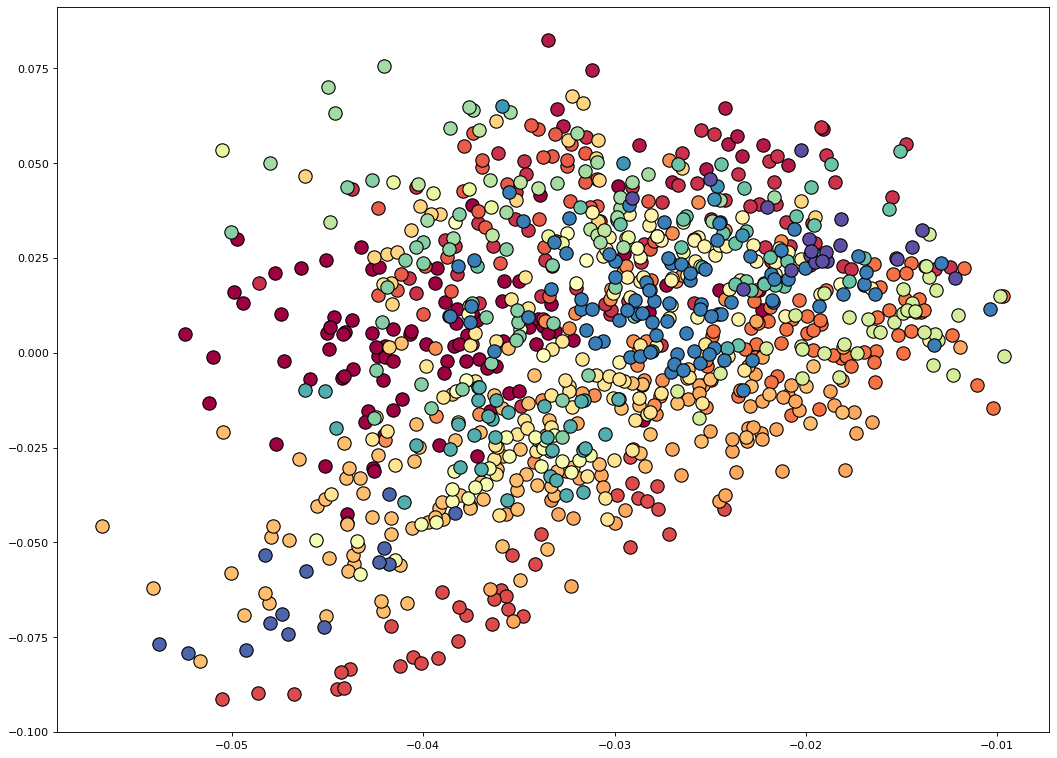

In [182]:
unique_labels = set(clustering.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(16, 12), dpi=80)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clustering.labels_ == k)

    x = pca.components_[0][class_member_mask]
    y = pca.components_[1][class_member_mask]
    plt.plot(x, y, 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=12)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [168]:
#inertia is k-means loss
kmeans.inertia_

5267.892017586439

## OPTICS Clustering

In [169]:
clustering = OPTICS(min_samples=3).fit(coefs)

In [170]:
clusters = {}
for i, label in enumerate(clustering.labels_):
    if (label in clusters):
        clusters[label].append(courses[i])
    else:
        clusters[label] = [courses[i]]
pprint(len(clusters[-1]))
pprint(clusters)

776
{-1: ['CS106A',
      'MATH51',
      'CS106B',
      'STATS60',
      'ECON1',
      'CHEM33',
      'PSYCH1',
      'PHYSICS41',
      'CHEM35',
      'MATH53',
      'CHEM31A',
      'CS161',
      'CHEM31B',
      'CHEM131',
      'MATH52',
      'ENGR14',
      'ENGR40',
      'PSYCH195',
      'CHEM130',
      'MATH42',
      'CS110',
      'CHEM31X',
      'ME101',
      'CS108',
      'MATH41',
      'CHEM135',
      'ENGR30',
      'CS221',
      'CS147',
      'CS145',
      'ENGR50',
      'CS106X',
      'CS154',
      'BIO44X',
      'ENGR40M',
      'CS142',
      'PHIL80',
      'CS124',
      'CS103A',
      'CS148',
      'CME106',
      'CS229',
      'CS194',
      'ENGR62',
      'ECON116',
      'STATS110',
      'ECON155',
      'LINGUIST1',
      'COMM108',
      'CS157',
      'MATH104',
      'ME140',
      'ME113',
      'ECON126',
      'MATH120',
      'CEE70',
      'STATS200',
      'BIO44Y',
      'CS106L',
      'HUMBIO129S',
      'PSYCH120',
      

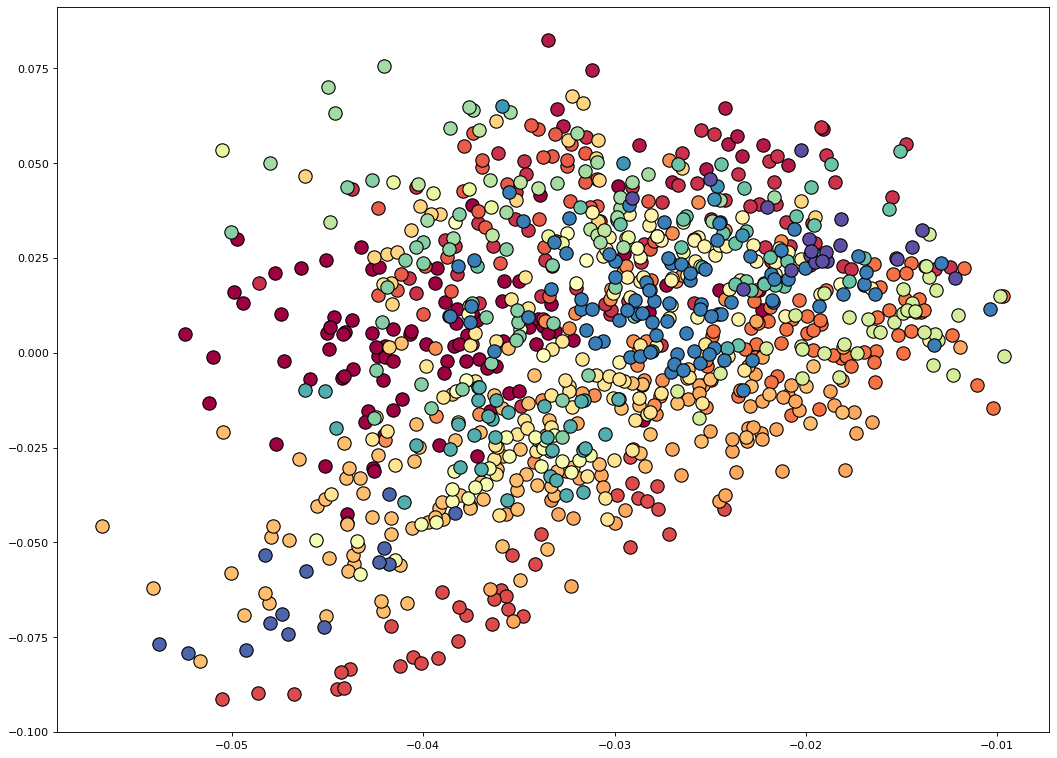

In [183]:
unique_labels = set(clustering.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(16, 12), dpi=80)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clustering.labels_ == k)

    x = pca.components_[0][class_member_mask]
    y = pca.components_[1][class_member_mask]
    plt.plot(x, y, 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=12)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## DBSCAN Clustering

In [171]:
clustering = DBSCAN(eps=2, min_samples=2).fit(coefs)

In [172]:
clusters = {}
for i, label in enumerate(clustering.labels_):
    if (label in clusters):
        clusters[label].append(courses[i])
    else:
        clusters[label] = [courses[i]]
pprint(len(clusters[-1]))
pprint(len(clusters))
pprint(clusters)

544
50
{-1: ['MATH51',
      'STATS60',
      'ECON1',
      'PSYCH1',
      'ENGR14',
      'ENGR40',
      'PSYCH195',
      'CME100',
      'CHEM31X',
      'CHEM135',
      'CME102',
      'ENGR50',
      'CS106X',
      'CS154',
      'BIO44X',
      'ENGR40M',
      'CS103A',
      'CME106',
      'CS194',
      'ENGR62',
      'ECON116',
      'STATS110',
      'ECON165',
      'ECON155',
      'CS157',
      'MATH104',
      'ECON126',
      'CME104',
      'BIO44Y',
      'CS106L',
      'HUMBIO129S',
      'PSYCH120',
      'STATS202',
      'CHEM190',
      'CHEM181',
      'CS181',
      'PSYCH131',
      'MS&E245G',
      'PSYCH101',
      'LINGUIST120',
      'CME103',
      'ECON113',
      'PHIL102',
      'CS247',
      'MATH131P',
      'CS248',
      'CME100A',
      'SYMSYS100',
      'PHIL1',
      'MATH108',
      'CS193P',
      'PHYSICS41A',
      'PHIL50',
      'EE103',
      'ECON136',
      'STATS141',
      'AA100',
      'ECON149',
      'ECON137',
      '

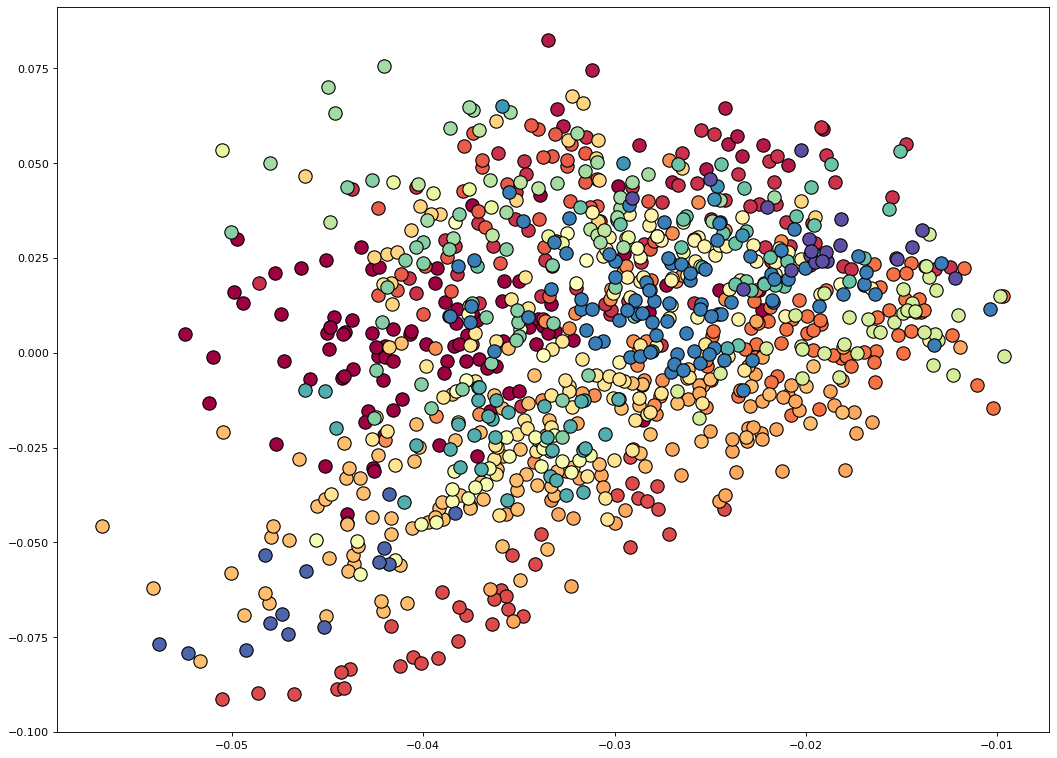

In [184]:
unique_labels = set(clustering.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(16, 12), dpi=80)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clustering.labels_ == k)

    x = pca.components_[0][class_member_mask]
    y = pca.components_[1][class_member_mask]
    plt.plot(x, y, 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=12)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Agglomerative Clustering

In [173]:
clustering = AgglomerativeClustering(n_clusters=25).fit(coefs)

In [174]:
clusters = {}
for i, label in enumerate(clustering.labels_):
    if (label in clusters):
        clusters[label].append(courses[i])
    else:
        clusters[label] = [courses[i]]
# pprint(len(clusters[-1]))
pprint(len(clusters))
pprint(clusters)

25
{0: ['EE102A',
     'EE101A',
     'EE101B',
     'EE102B',
     'EE103',
     'EE178',
     'EE261',
     'EE108',
     'EE263',
     'EE116',
     'EE65',
     'EE133',
     'EE271',
     'EE180',
     'EE282',
     'EE278',
     'EE179',
     'EE109',
     'EE142',
     'EE114',
     'EE134',
     'EE124',
     'EE222',
     'EE122A',
     'EE212',
     'EE216',
     'EE118',
     'EE107',
     'EE223',
     'EE264',
     'EE136',
     'EE293B',
     'ME346A',
     'ENGR205',
     'EE153',
     'EE242',
     'EE169',
     'EE273',
     'EE122B',
     'EE279',
     'OSPPARIS40P',
     'EE155',
     'EE214B',
     'CME364A',
     'EE368',
     'MUSIC320A',
     'EE252',
     'EE369B',
     'MUSIC424',
     'EE262',
     'MUSIC422',
     'EE373A',
     'CME302',
     'EE214A',
     'EE253',
     'MATSCI203',
     'AA272C',
     'MUSIC320B',
     'EE369A',
     'MATSCI320',
     'EE234',
     'EE315',
     'EE236A',
     'MATSCI209',
     'CME213',
     'CS327A',
     'ENGR209A',
   

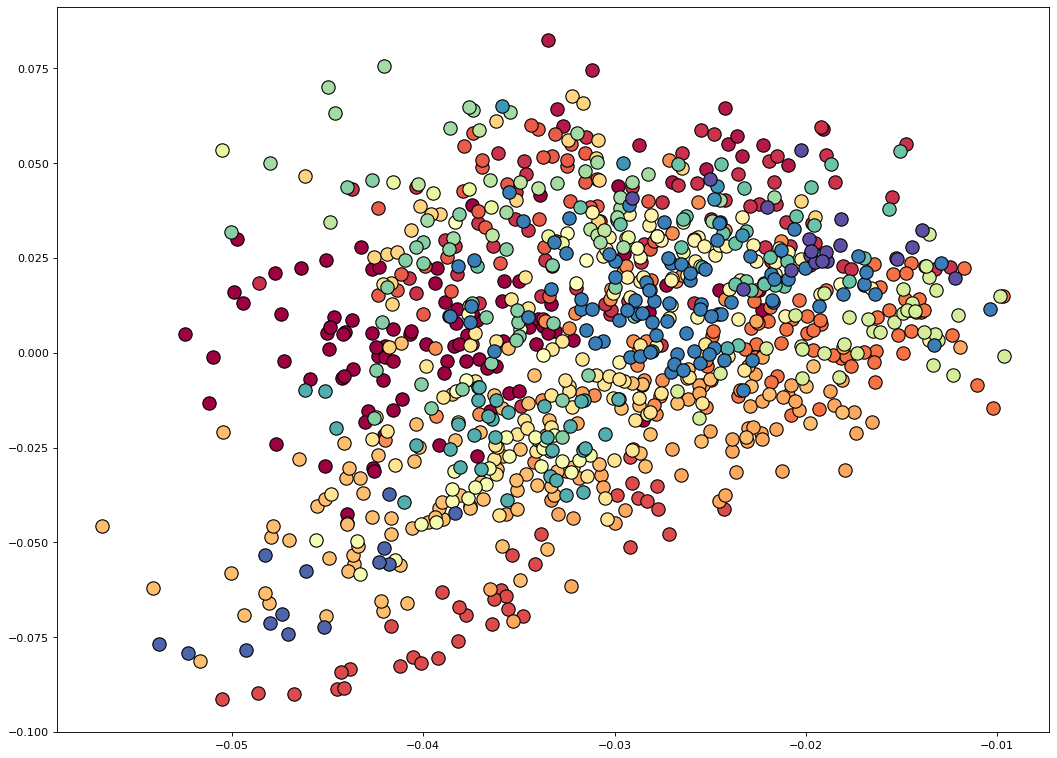

In [185]:
unique_labels = set(clustering.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(16, 12), dpi=80)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clustering.labels_ == k)

    x = pca.components_[0][class_member_mask]
    y = pca.components_[1][class_member_mask]
    plt.plot(x, y, 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=12)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()